In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [2]:
import numpy as np
import cv2 as cv
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches
from detectron2.structures import pairwise_iou, boxes

from detection.inference.detector import lesion_detector, post_process_pred

# Validation phase
- In this part we select the best model of each fine-tuned model and we validate it using the validation set.

In [3]:
## model inputs
config_file = repo_path / 'detection/training/config_files/fine_tuning_CEM.yaml'
min_score = 0.1 # minimum score threshold to keep the prediction

## data inputs
im_dir = repo_path / 'data/CDD-CESM/images/substracted' # images directory (can contain other not only test)
metadata_path = repo_path / 'data/CDD-CESM/metadata/bboxes/split_1/val_set.csv' # val metadata (only val)

[03/06 17:24:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/ricardo/projects/CEM-Detect/data/models/model_final_R_101_omidb_30k_dbt9k_f12_gray.pth ...


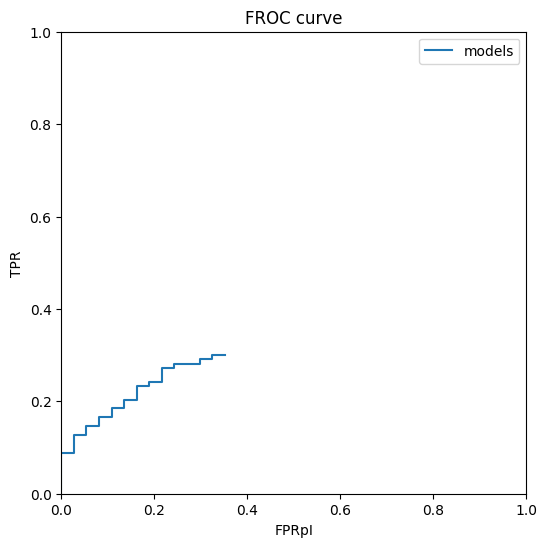

In [5]:
# define figure ot visualize curves
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('FPRpI')
ax.set_ylabel('TPR')
ax.set_title('FROC curve')
# set TPR limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)

model_list = ['data/models/model_final_R_101_omidb_30k_dbt9k_f12_gray.pth', # original DBT
              

]

for model_file in model_list:

    model_file = repo_path / model_file

    detector = lesion_detector(config_file, model_file, metadata_path, im_dir, min_score)
    detector.start_metrics()
    for im_name in detector.test_df['image_name'].unique()[0:]:
        detector.c_im_name = im_name
        detector.prepare_im_gt()
        detector.predict()
        # detector.show_c_predictions()
        # metrics computing
        used_preds = detector.compute_TP_FN_counts(show=False)
        detector.compute_FP_counts(used_preds)
    froc_info  = detector.compute_FROC()

    # smooth curve
    ax.plot(froc_info['FPpI'], froc_info['TPR'], marker='', label=f'{model_file.parent.name}', linestyle='-', linewidth=1.5)
    ax.legend()



In [20]:
pred_nums = np.where(detector.c_gt_pred_ious[2] >= 0.3)
pred_nums[0].tolist()

[2]

In [12]:
original_list = [0]

array_trial = np.array([0,4])
# to tuple
tuple_trial = tuple(array_trial)
# to list
list_trial = list(tuple_trial)
# list_trial = [element for element in tuple_trial]

# # add the original list to the list_trial
# original_list.extend(list_trial)
# # remove repeted elements
# original_list = list(set(original_list))
# original_list